# Optimistic Initial Values

The methods we have discussed so far are dependent on the initial action-value estimates $Q_1(a)$, meaning that the methods are _biased_ by their initial estimates. For the sample-average methods, the bias disappears once all actions have been selected at least once, but for methods with constant $\alpha$, the bias is permanent. though decreasing over time. Also, the initial value estimates supply some prior knowledge about what level of rewards can be expected. Therefore, we must be careful when choosing the initial value estimates.

Suppose, instead of zero, we set the initial action values to 5. If we maintain $q_*(a)$ to be selected from a normal distribution with mean 0 and variance 1, this action value is extremely optimistic. This optimism encourages action-value methods to explore. Whichever actions are initially selected, the reward is less than the starting estimates; the learner switches to other actions, being "disappointed" with the rewards it is receiving. The result is that all actions are tried several times before the value estimates converge. The system deos a fair amount of exploration even if greedy actions are selected all the time.



In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
n_episodes = 2000
n_timesteps = 1000
k = 10
epsilons = [0, 0.1]
n_epsilons = len(epsilons)
alpha = 0.1

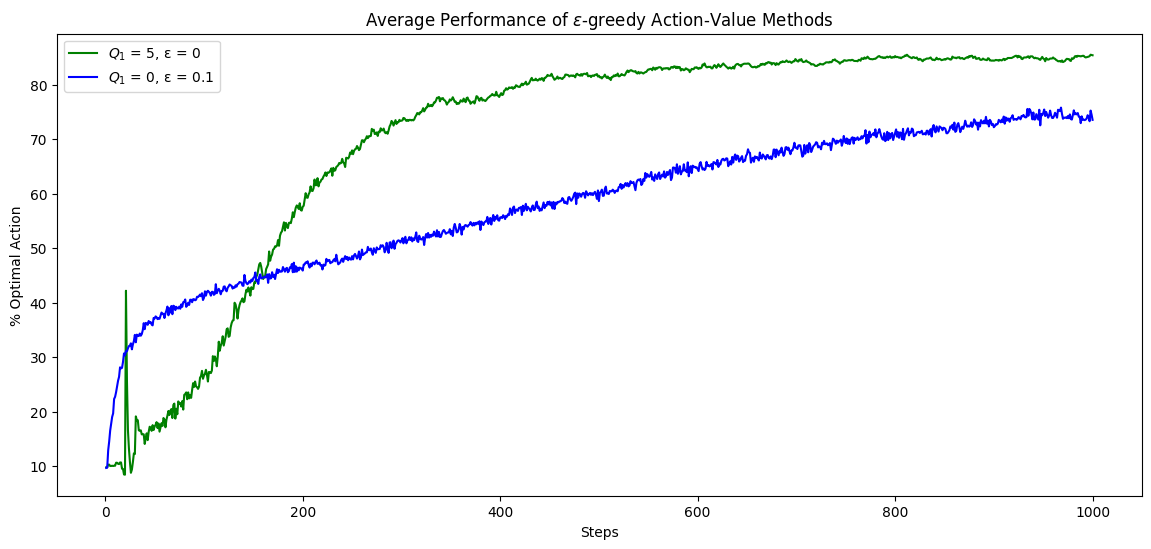

In [3]:
history = [[[0 for _ in range(n_timesteps)] for _ in range(n_episodes)] for _ in range(n_epsilons)]

for episode in range(n_episodes):
    q_star = [np.random.normal(0, 1) for _ in range(k)]
    optimal_action = np.argmax(q_star)
    q_hat = [[5 for _ in range(k)], [0 for _ in range(k)]]
    action_count = [[0 for _ in range(k)] for _ in range(n_epsilons)]
    
    for timestep in range(n_timesteps):
        # random number between 0 and 1
        random_number = np.random.rand()
        
        for i in range(n_epsilons):
            epsilon = epsilons[i]
            
            # choose a random action with probability epsilon
            if random_number < epsilon:
                action = np.random.choice(range(k))
            else:
                action = np.argmax(q_hat[i])

            # the reward is selected from a normal distribution with mean q_star and variance 1
            reward = np.random.normal(q_star[action], 1)
            
            if action == optimal_action:
                history[i][episode][timestep] = 1

            # update the estimate of q_star
            if not action_count[i][action]:
                pass
            else:
                q_hat[i][action] += alpha * (reward - q_hat[i][action])

            action_count[i][action] += 1

# Calculate average reward
avg_optimal_action = np.zeros((n_epsilons, n_timesteps))
for i in range(n_epsilons):
    for t in range(n_timesteps):
        avg_optimal_action[i, t] = 100 * np.sum([history[i][episode][t] for episode in range(n_episodes)]) / n_episodes

# Plotting
plt.figure(figsize=(14, 6))
colours = ['green', 'blue']
labels = ['$Q_1$ = 5, ε = 0', '$Q_1$ = 0, ε = 0.1']

for i in range(n_epsilons):
    plt.plot(range(1, n_timesteps + 1), avg_optimal_action[i], color=colours[i], label=labels[i])

plt.xlabel('Steps')
plt.ylabel('% Optimal Action')
plt.title('Average Performance of $\epsilon$-greedy Action-Value Methods')
plt.legend()
plt.show()

Initially, the optimistic method performs significantly worse because it explores more. However, eventually it perfoms better as its exploration decreases with time. This technique fo encouraging exploration is called _optimistic initial values_. Although it is a simple trick that can be quite effective on stationary problems, however, it is not well suited to nonstationary problems as its drive for exploration is inherently temporary. Methods that treat the beginning of time as a special event generally do not work well with nonstationary cases.